### Haberman's survival Data Set:

* DataSet Source:https://www.kaggle.com/gilsousa/habermans-survival-data-set
* The dataset contains data from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.
* Number of Data Points: 306
* Number of Independant Variables: 3 (patient_age, operation_year, axillary_nodes)
* Number of Dependanet Variables: 1 (suvival_status)
* Objective: To Classify the survival status of cancer patients as belonging to one of the 2 classes based on the given  three attributes.

### Data Dictionary:

* **patient_age** : Age of patient at the the time of operation(numerical)
* **operation_year** : Patient's year of operation (year - 1900, numerical)
* **axillary_nodes** : Number of positive axillary nodes detected (numerical)
* **survival_status** : Survival status (class attribute) where 1 = the patient survived 5 years or longer, and 2 = the patient died within 5 years

### Things to Analyse

* number of points, number of features, number of classes, data-points per class
* Univaraite analysis(PDF, CDF, Boxplot, Voilin plots) to understand which features are useful towards classification.
* Bi-variate analysis (scatter plots, pair-plots) to see if combinations of features are useful in classfication.

### Loading the Dataset:

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [4]:
col_names=['patient_age','operation_year','axillary_nodes','survival_status'] 
patients_df=pd.read_csv('F:/Applied AI Course/haberman.csv',names=col_names)

In [5]:
# (Q) how many data-points and features?
print(patients_df.shape)

(306, 4)


In [6]:
#(Q) What are the column names in our dataset?
print (patients_df.columns)

Index(['patient_age', 'operation_year', 'axillary_nodes', 'survival_status'], dtype='object')


In [7]:
#(Q) How many data points for each class are present? 


patients_df["survival_status"].value_counts()

1    225
2     81
Name: survival_status, dtype: int64

### Observation:

* Number of people survived 5 years or longer after surgery are 225
* Number of people who survived less then 5 years after surgery are 81

In [8]:
# First 5 rows of dataset

print(patients_df.head())

   patient_age  operation_year  axillary_nodes  survival_status
0           30              64               1                1
1           30              62               3                1
2           30              65               0                1
3           31              59               2                1
4           31              65               4                1


### 1.Univariate Analysis:

### 1.1 Probabilty Density Function(PDF)

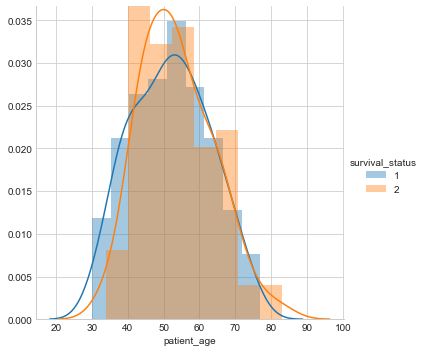

In [10]:
sns.set_style("whitegrid");
sns.FacetGrid(patients_df, hue="survival_status", size=5) \
   .map(sns.distplot, "patient_age") \
   .add_legend();
plt.show();

### Observation:

* Patients with age in the range 40-50 had died within 5 years
* Patients with age in the range 30-40 had survived more than 5 years

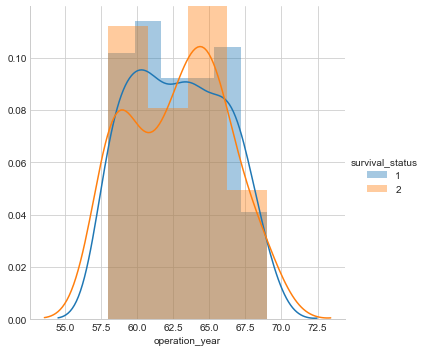

In [11]:
sns.set_style("whitegrid");
sns.FacetGrid(patients_df, hue="survival_status", size=5) \
   .map(sns.distplot, "operation_year") \
   .add_legend();
plt.show();

### Observation:

* Patients had died within 5 years between the operation_year 1963-1966
* Between the years 1960 -1962,patients survived more >5 years

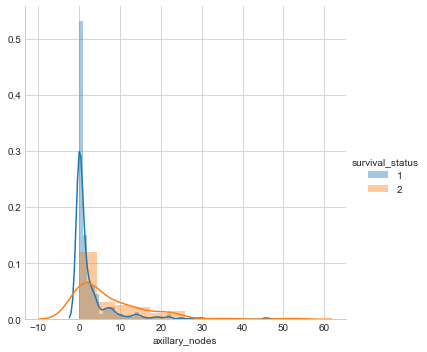

In [12]:
sns.FacetGrid(patients_df, hue="survival_status", size=5) \
   .map(sns.distplot, "axillary_nodes") \
   .add_legend();
plt.show();

### Observations:

* Patients with axillary_nodes in the range 0-4 had survived more than 5 years
* Patients with axillary_nodes greater than 4 had died within 5 years

### 1.2 Cumulative Distribution Function(CDF)

In [15]:
patient_1=patients_df.loc[patients_df['survival_status']==1]
patient_2=patients_df.loc[patients_df['survival_status']==2]

[ 0.05333333  0.10666667  0.12444444  0.09333333  0.16444444  0.16444444
  0.09333333  0.11111111  0.06222222  0.02666667]
[ 30.   34.7  39.4  44.1  48.8  53.5  58.2  62.9  67.6  72.3  77. ]
[ 0.02469136  0.01234568  0.04938272  0.07407407  0.12345679  0.07407407
  0.07407407  0.12345679  0.09876543  0.03703704  0.03703704  0.08641975
  0.04938272  0.04938272  0.03703704  0.01234568  0.01234568  0.01234568
  0.          0.01234568]
[ 34.    36.45  38.9   41.35  43.8   46.25  48.7   51.15  53.6   56.05
  58.5   60.95  63.4   65.85  68.3   70.75  73.2   75.65  78.1   80.55  83.  ]


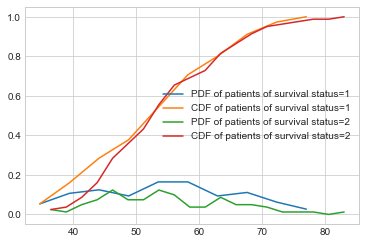

In [21]:
#Plot CDF of patient age of survival status=1

counts, bin_edges = np.histogram(patient_1['patient_age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label="PDF of patients of survival status=1");
plt.plot(bin_edges[1:], cdf,label="CDF of patients of survival status=1")

#Plot CDF of patient age of survival status=2

counts, bin_edges = np.histogram(patient_2['patient_age'], bins=20, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label="PDF of patients of survival status=2");
plt.plot(bin_edges[1:], cdf,label="CDF of patients of survival status=2")
plt.legend()
plt.show();


[ 0.18666667  0.10666667  0.10222222  0.07111111  0.09777778  0.10222222
  0.06666667  0.09777778  0.09333333  0.07555556]
[ 58.   59.1  60.2  61.3  62.4  63.5  64.6  65.7  66.8  67.9  69. ]
[ 0.14814815  0.11111111  0.          0.04938272  0.          0.03703704
  0.          0.08641975  0.          0.09876543  0.09876543  0.
  0.16049383  0.          0.07407407  0.          0.04938272  0.
  0.03703704  0.04938272]
[ 58.    58.55  59.1   59.65  60.2   60.75  61.3   61.85  62.4   62.95
  63.5   64.05  64.6   65.15  65.7   66.25  66.8   67.35  67.9   68.45  69.  ]


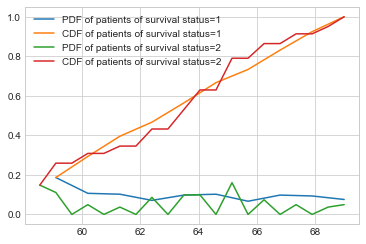

In [22]:
#Plot CDF of patient age of survival status=1

counts, bin_edges = np.histogram(patient_1['operation_year'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label="PDF of patients of survival status=1")
plt.plot(bin_edges[1:], cdf,label="CDF of patients of survival status=1")

#Plot CDF of patient age of survival status=2

counts, bin_edges = np.histogram(patient_2['operation_year'], bins=20, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label="PDF of patients of survival status=2")
plt.plot(bin_edges[1:], cdf,label="CDF of patients of survival status=2")
plt.legend()
plt.show();

[ 0.83555556  0.08        0.02222222  0.02666667  0.01777778  0.00444444
  0.00888889  0.          0.          0.00444444]
[  0.    4.6   9.2  13.8  18.4  23.   27.6  32.2  36.8  41.4  46. ]
[ 0.39506173  0.17283951  0.0617284   0.08641975  0.04938272  0.08641975
  0.01234568  0.03703704  0.0617284   0.01234568  0.          0.          0.
  0.01234568  0.          0.          0.          0.          0.
  0.01234568]
[  0.    2.6   5.2   7.8  10.4  13.   15.6  18.2  20.8  23.4  26.   28.6
  31.2  33.8  36.4  39.   41.6  44.2  46.8  49.4  52. ]


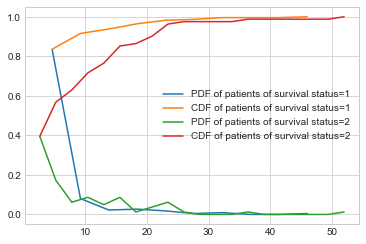

In [23]:
#Plot CDF of patient age of survival status=1

counts, bin_edges = np.histogram(patient_1['axillary_nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label="PDF of patients of survival status=1");
plt.plot(bin_edges[1:], cdf,label="CDF of patients of survival status=1")

#Plot CDF of patient age of survival status=2

counts, bin_edges = np.histogram(patient_2['axillary_nodes'], bins=20, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label="PDF of patients of survival status=2");
plt.plot(bin_edges[1:], cdf,label="CDF of patients of survival status=2")
plt.legend()
plt.show();

### 1.3 Box Plot

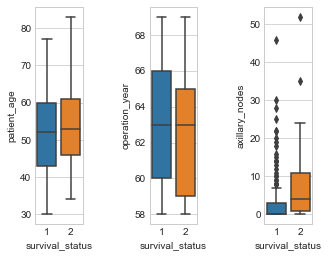

In [26]:
plt.figure(1)
plt.subplot(161)
#Box Plot using patients age.
sns.boxplot(x='survival_status',y='patient_age', data=patients_df)

#Box Plot using Patients operation year.
plt.subplot(163)
sns.boxplot(x='survival_status',y='operation_year',data=patients_df)

#Box Plot using no. of positive axillary nodes.
plt.subplot(165)
sns.boxplot(x='survival_status',y='axillary_nodes',data=patients_df)
plt.show()


### Observations:

### From Fig 1

* 50% of the patients who survived > 5 years age between 42-60.
* 50% of the patients who didnt survive > 5 years age between 46-61.

### From Fig 2

* 50 % of the patients survived > 5 years during the operation period of 1960-1966.
* 50 % of the patients survived <5 years during the operation period  of 1959-1965.

### From Fig 3

* 75 % of the patients survived >5 years  had axillary nodes <2.
* 50 % of the patients survived <5 years had axillary nodes between 2-4.

### 1.4 Violin Plots

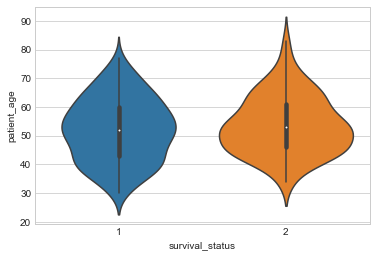

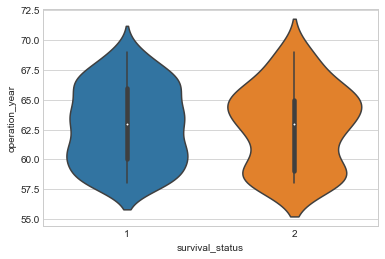

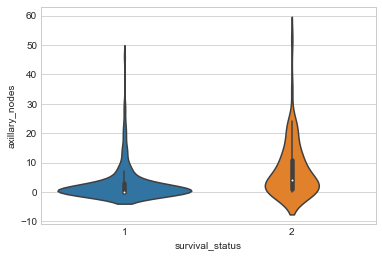

In [30]:
#Violin Plot using patients age.
sns.violinplot(x='survival_status',y='patient_age',data=patients_df)
plt.show()
#Violin Plot using Patients operation year.
sns.violinplot(x='survival_status',y='operation_year',data=patients_df)
plt.show()
#Violin Plot using no. of positive axillary nodes.
sns.violinplot(x='survival_status',y='axillary_nodes',data=patients_df)
plt.show()

### Conclusion:

* Performing univariate analysis it seems that patients_age is one of the most useful features towards Classification.

### 2.Bivariate Analysis

### 2.1 Scatter Plot

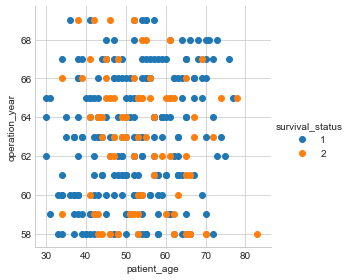

In [31]:
# 2-D Scatter plot with color-coding for each class/survival_status.
# Here 'sns' corresponds to seaborn. 

sns.FacetGrid(patients_df, hue="survival_status", size=4) \
   .map(plt.scatter, "patient_age", "operation_year") \
   .add_legend();
plt.show();

### Observation

* Seperating survival status 1 and 2 is much harder as they have considerable overlap.

### 2.2 Pair Plots

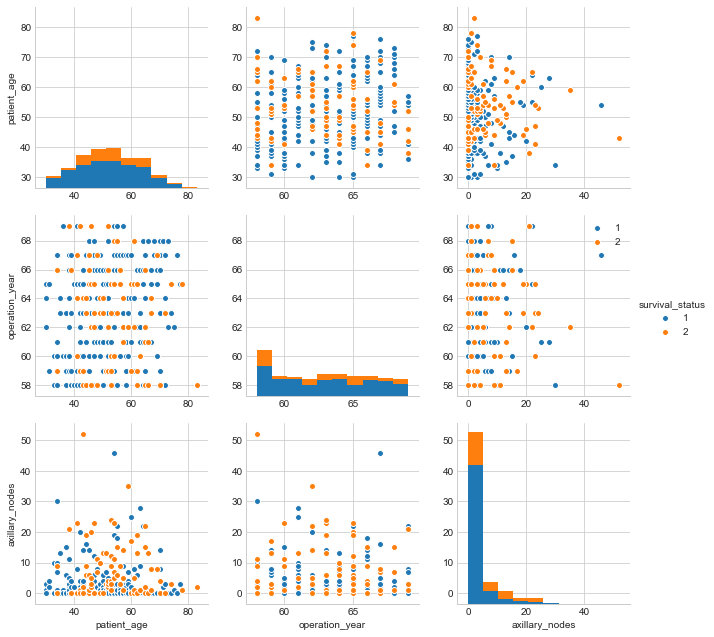

In [9]:
plt.close();
sns.set_style("whitegrid");
sns.pairplot(patients_df, hue="survival_status", size=3,vars=["patient_age", "operation_year","axillary_nodes"]);
plt.legend()
plt.show()

* From the above Pair plot it seems patient_age and axillary_nodes are the most useful feature for find the survival status of patients.

### 2.3 Multivariate probability density, contour plot

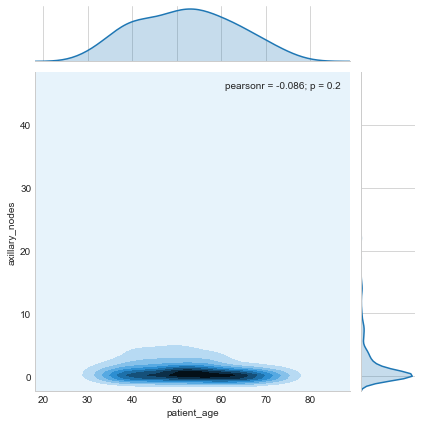

In [37]:
#2D Density plot, contors-plot
sns.jointplot(x="patient_age", y="axillary_nodes", data=patient_1, kind="kde");
plt.show();


* Patients aged between 45-55  with axillary nodes in range 0-5 has maximum density with survival_year>5.

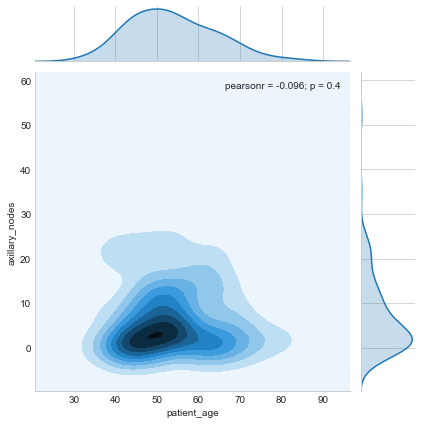

In [39]:
#2D Density plot, contors-plot
sns.jointplot(x="patient_age", y="axillary_nodes", data=patient_2, kind="kde");
plt.show();

* Patients aged between 49-53 with axillary nodes in range 1-3 has maximum density with survival_year < 5.